In [2]:
#1. Install PyPDF2 and py-readability-metrics

!pip install PyPDF2
!pip install py-readability-metrics

In [3]:
#2. In a new notebook, import nltk and run the following commands:
#a. nltk.download(‘punkt’)
#b. nltk.download(‘stopwords’)
#c. nltk.download(‘vader_lexicon’)

import nltk
from nltk import download

download('punkt')
download('stopwords')
download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...


True

3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your 
notebook, briefly characterize the issue at hand and your impressions from a news reporting 
objectivity perspective.


the Fox News article: appears to have a more critical tone, emphasizing the severity of the allegations and including perspectives and comments from critics, and previous controversies with Gay.

The Reuters article: maintains a more neutral stance. It focuses on the corrections and actions Gay has been planning to submit corrections.

In [4]:
from PyPDF2 import PdfReader

In [7]:
#4. Use PyPDF2 to extract the text out of each document 
#a.1 Display the text Reuters Article

reuter_reader = PdfReader('C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/W3. Asignment 1 reuters.pdf')
reuter_pages = len(reuter_reader.pages)
reuter_text = ''

for i in range(reuter_pages):
    text = reuter_reader.pages[i].extract_text()
    reuter_text += text + ' '
 
print (reuter_text)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In [9]:
#4. Use PyPDF2 to extract the text out of each document 
#a.2 Display the text for Fox Article

fox_reader = PdfReader('C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/W3. Assignment 1 foxnews.pdf')
fox_pages = len(fox_reader.pages)
fox_text = ''

for i in range(fox_pages):
    text = fox_reader.pages[i].extract_text()
    fox_text += text + ' '
 
print (fox_text)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

b. Briefly note any anomalies in your notebook
Anomalies:

After reviewing both texts, we can evidence that it is extracting all text including things like "Haiyun Jiang/Bloomberg via Getty Images" or "Scroll to continue" that we do not need and might affect the sentiment analysis.
Also, we might evidence mistakes in the spacing of the words such as "HAR VARD BOARD ST ANDS BY EMBA TTLED PRESIDENT CLAUDINE GA Y, ADMITS"

In [11]:
#5. Use NLTK to complete sentiment analysis for each of the articles
#Reuters

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiment_reuters = sia.polarity_scores(reuter_text)
print(sentiment_reuters)

{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [12]:
#5. Use NLTK to complete sentiment analysis for each of the articles
#Fox

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiment_fox = sia.polarity_scores(fox_text)
print(sentiment_fox)

{'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


a. Compare the results from the two articles

The reuters article has a predominant neutral classification with 0.904 with a small portion of negative 0.07 and even smaller of positive 0.026. Finally the compound (which is used as a quick measure of sentiment from -1 to 1) is negative, indicating that the article is mainly negative

The fox article also has a predominant neutral classfication with 0.863 with a small proportion of positive 0.073 and even smaller negative 0.064. Finally the compound (which is used as a quick measure of sentiment from -1 to 1) is positive, indicating that the article is mainly positive.

b. Compare the results to your reading of the articles; do you agree with the outcome?

The results do not match the impression shared in the begining, since it characterizes the reuters article as more negative than the one in fox. The overall compound in fox remains positive, while the reuters is negative. I disagree with the outcome considering the approach and way of writting

In [15]:
#6. Run sentiment analysis on the article headlines

headline_reuters = "Harvard president will submit dissertation edits after plagiarism allegations"
headline_fox = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

sentiment_headline_reuters = sia.polarity_scores(headline_reuters)
print('Reuters:', sentiment_headline_reuters)

sentiment_headline_fox = sia.polarity_scores(headline_fox)
print('Fox:',sentiment_headline_fox)

Reuters: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fox: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


a. Do those results agree with the overall sentiment?

The results of the sentiment considering the headline only, do not match the overall sentiment.
We see that when analyzing only the headline the sentiment of reuters is neutral 100% while the fox article moves from positive to negative 

In [16]:
#7. Using py-readability-metrics complete 2-3 different readability scores

!pip install py-readability-metrics

from readability import Readability

In [24]:
#Variables

readability_obj_reuter = Readability(reuter_text)
readability_obj_fox = Readability(fox_text)

#Reuters Article

fleshreuters = readability_obj_reuter.flesch()

print('Reuters')
print(fleshreuters.score)
print(fleshreuters.ease)
print(fleshreuters.grade_levels)

Reuters
18.384675005023126
very_confusing
['college_graduate']


In [25]:
#Fox Article

fleshfox = readability_obj_fox.flesch()

print('Fox')
print(fleshfox.score)
print(fleshfox.ease)
print(fleshfox.grade_levels)

Fox
21.41115320671068
very_confusing
['college_graduate']


a. Discuss what the chosen metric is measuring

The chosen metric is used as the standard test of readability for its documents and forms

b. Compare the scores from both articles

The score is higher when the article is less confusing, therfore, even though both articles are confusing, the reuters seems to be even more

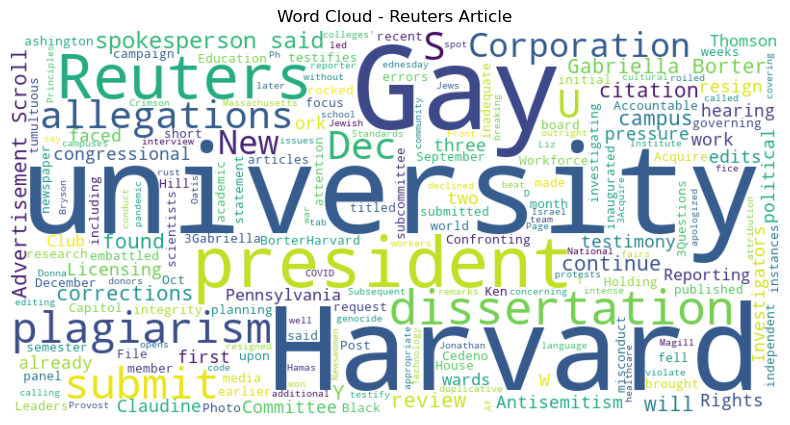

In [28]:
#8. Using wordcloud, create word clouds for both articles

#Reuters

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_reuters = WordCloud(width=800, height=400, background_color='white').generate(reuter_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_reuters, interpolation='bilinear')
plt.title("Word Cloud - Reuters Article")
plt.axis('off')
plt.show()

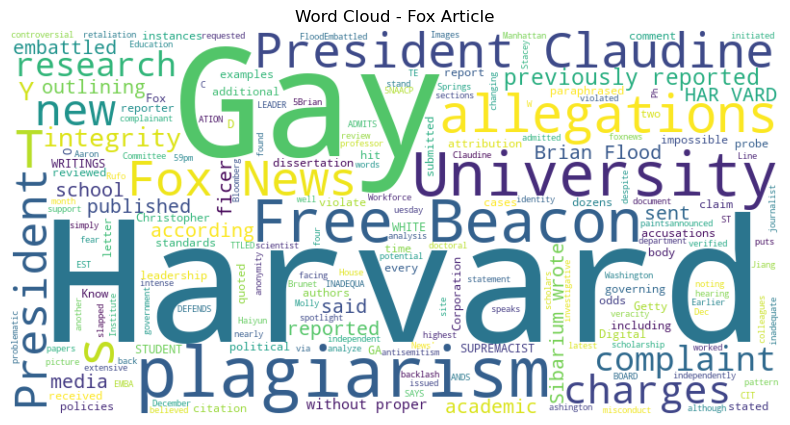

In [29]:
#Reuters

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_fox = WordCloud(width=800, height=400, background_color='white').generate(fox_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fox, interpolation='bilinear')
plt.title("Word Cloud - Fox Article")
plt.axis('off')
plt.show()

a. Briefly comment on the word clouds

For Reuters article the wordcloud highlights words like Harvard, President, Gay, Plagirism, Submit, and Dissertation.
This article and the wordcloud when compared to fox does show less sentiment of negativity considering the words that show.


For Fox article the wordcloud highlights words like Harvard, President, Claudine, Gay which makes sense consideing the article is about her. Nevertheless, it does show a bigger importance on the word plagiarism, charges, complaint and free beacon (which is the source). This actually contributes with the first impression of it being more negative than the reuters article
